<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week3/week3_KL_div.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_csv("/content/Base_and_Simulated_Data.csv")
print(data.info(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SalesVolume_Base  100000 non-null  float64
 1   Deposits_Base     100000 non-null  float64
 2   AdResponse_Base   100000 non-null  float64
 3   CBM_Base          100000 non-null  float64
 4   SalesVolume_Sim   100000 non-null  float64
 5   Deposits_Sim      100000 non-null  float64
 6   AdResponse_Sim    100000 non-null  float64
 7   CBM_Sim           100000 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB
None    SalesVolume_Base  Deposits_Base  AdResponse_Base  CBM_Base  \
0     350932.833478   64472.659781      7717.054762     623.5   
1     325974.084392   77062.732059      9053.397524     673.3   
2     369695.269078   85278.918888      8430.936758     611.5   
3     349863.021707   88720.123963      7909.650378     645.6   
4     345170.976081   50746.021604      7

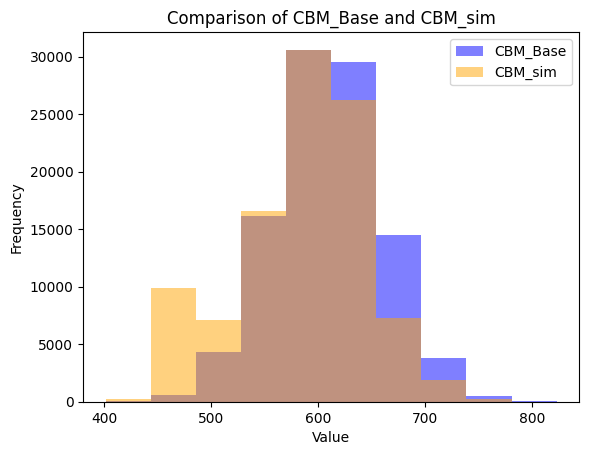

In [6]:
# plot distributions

plt.hist(data['CBM_Base'], bins=10, alpha=0.5, label='CBM_Base', color='blue')
plt.hist(data['CBM_Sim'], bins=10, alpha=0.5, label='CBM_sim', color='orange')

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of CBM_Base and CBM_sim')
plt.legend(loc='upper right')

plt.show()

In [20]:
# Create bins
data['p_bins'] = pd.cut(data['CBM_Base'], bins=10, labels= [i for i in range(10)], include_lowest=True)
data['q_bins'] = pd.cut(data['CBM_Sim'], bins=10, labels= [i for i in range(10)], include_lowest=True)

# Calculate counts and proportions
base_counts = data['p_bins'].value_counts(sort=False)  # Get counts per bin
base_proportions = (base_counts / base_counts.sum())  # Calculate proportions

target_counts = data['q_bins'].value_counts(sort=False)  # Get counts per bin
target_proportions = (target_counts / target_counts.sum())  # Calculate proportions

# Add a small constant to avoid division by zero or log(0)
base_proportions += 1e-10
target_proportions += 1e-10

# PSI

parts_psi = (base_proportions - target_proportions) * np.log(base_proportions / target_proportions)
PSI = parts_psi.sum()
print(PSI)

0.3481216331000023


In [21]:
# putting this together in a function

def calc_psi(data, base_col, target_col, bins=10):
  data['p_bins'] = pd.cut(data[base_col], bins=bins, labels= [i for i in range(10)], include_lowest=True)
  data['q_bins'] = pd.cut(data[target_col], bins=bins, labels= [i for i in range(10)], include_lowest=True)

  base_counts = data['p_bins'].value_counts(sort=False)
  base_proportions = (base_counts / base_counts.sum())

  target_counts = data['q_bins'].value_counts(sort=False)
  target_proportions = (target_counts / target_counts.sum())

  base_proportions += 1e-10
  target_proportions += 1e-10

  parts_psi = (base_proportions - target_proportions) * np.log(base_proportions / target_proportions)
  PSI = parts_psi.sum()

  return PSI

print(calc_psi(data, 'CBM_Base', 'CBM_Sim'))

0.3481216331000023


# Now do the same for other base and simulated columns in the data
